In [2]:
import pandas as pd
import numpy as np
import cv2 as cv
# import seaborn as sns
import os
import tensorflow as tf

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import load_model

import cv2
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, Flatten
from keras.optimizers import Adam

import warnings
import sys
if not sys.warnoptions:
    warnings.simplefilter("ignore")
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [3]:


import cv2

# Load the image
img = cv2.imread('/kaggle/input/fer2013plus/fer2013plus/fer2013/train/anger/fer0000010.png')

# Get dimensions
height, width, channels = img.shape
print(f'Dimensions: {width}x{height}')





Dimensions: 48x48


In [4]:
# Contains the FER Training data
# Create a data generator with augmentation
train_data_generator = ImageDataGenerator(
    rescale=1./255,
    rotation_range=15,
    width_shift_range=0.15,
    height_shift_range=0.15,
    shear_range=0.15,
    zoom_range=0.15,
    horizontal_flip=True,
)

fer_training_data = train_data_generator.flow_from_directory(
    '/kaggle/input/fer2013plus/fer2013plus/fer2013/train',
    target_size=(100, 100),
    batch_size=64,
    color_mode='grayscale',
    class_mode='categorical',
    classes=['anger', 'disgust', 'fear', 'happiness', 'neutral', 'sadness', 'surprise']
)

fer_training_data

Found 28221 images belonging to 7 classes.


In [5]:
# Contains the FER Test data
test_data_generator = ImageDataGenerator(rescale=1./255)
fer_test_data = test_data_generator.flow_from_directory(
    '/kaggle/input/fer2013plus/fer2013plus/fer2013/test',
    target_size = (100, 100),
    batch_size = 64,
    color_mode = 'grayscale',
    class_mode = 'categorical',
    classes=['anger', 'disgust', 'fear', 'happiness', 'neutral', 'sadness', 'surprise']
)
fer_test_data

Found 7048 images belonging to 7 classes.


In [6]:
from keras.layers import BatchNormalization
from keras.regularizers import l2
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau, EarlyStopping

In [7]:
from tensorflow.keras import optimizers
optims = [
    optimizers.Nadam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-07, name='Nadam'),
    optimizers.Adam(0.001),
]

In [8]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential()

model.add(
        Conv2D(
            filters=256,
            kernel_size=(3,3),
            input_shape=(48, 48, 1),
            activation='elu',
            padding='same',
            kernel_initializer='he_normal',
            name='conv2d_1'
        )
    )
model.add(BatchNormalization(name='batchnorm_1'))
model.add(
        Conv2D(
            filters=256,
            kernel_size=(5,5),
            activation='elu',
            padding='same',
            kernel_initializer='he_normal',
            name='conv2d_2'
        )
    )
model.add(BatchNormalization(name='batchnorm_2'))
    
model.add(MaxPooling2D(pool_size=(2,2), name='maxpool2d_1'))
model.add(Dropout(0.25, name='dropout_1'))

model.add(
        Conv2D(
            filters=256,
            kernel_size=(3,3),
            activation='elu',
            padding='same',
            kernel_initializer='he_normal',
            name='conv2d_3'
        )
    )
model.add(BatchNormalization(name='batchnorm_3'))
model.add(
        Conv2D(
            filters=256,
            kernel_size=(3,3),
            activation='elu',
            padding='same',
            kernel_initializer='he_normal',
            name='conv2d_4'
        )
    )
model.add(BatchNormalization(name='batchnorm_4'))
    
model.add(MaxPooling2D(pool_size=(2,2), name='maxpool2d_2'))
model.add(Dropout(0.25, name='dropout_2'))

model.add(
        Conv2D(
            filters=256,
            kernel_size=(3,3),
            activation='elu',
            padding='same',
            kernel_initializer='he_normal',
            name='conv2d_5'
        )
    )
model.add(BatchNormalization(name='batchnorm_5'))
model.add(
        Conv2D(
            filters=512,
            kernel_size=(3,3),
            activation='elu',
            padding='same',
            kernel_initializer='he_normal',
            name='conv2d_6'
        )
    )
model.add(BatchNormalization(name='batchnorm_6'))
    
model.add(MaxPooling2D(pool_size=(2,2), name='maxpool2d_3'))
model.add(Dropout(0.25, name='dropout_3'))

model.add(Flatten(name='flatten'))
        
model.add(
        Dense(
            256,
            activation='elu',
            kernel_initializer='he_normal',
            name='dense_1'
        )
    )
model.add(BatchNormalization(name='batchnorm_7'))
    
model.add(Dropout(0.25, name='dropout_4'))
    
model.add(
        Dense(
            7,
            activation='softmax',
            name='out_layer'
        )
    )
    
model.compile(
        loss='categorical_crossentropy',
        optimizer='adam',
        metrics=['accuracy']
    )
    
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_1 (Conv2D)                    │ (None, 48, 48, 256)         │           2,560 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batchnorm_1 (BatchNormalization)     │ (None, 48, 48, 256)         │           1,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 48, 48, 256)         │       1,638,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batchnorm_2 (BatchNormalization)     │ (None, 48, 48, 256)         │           1,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ maxpool2d_1 (MaxPooling2D)           │ (None, 24, 24, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 24, 24, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 24, 24, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batchnorm_3 (BatchNormalization)     │ (None, 24, 24, 256)         │           1,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 24, 24, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batchnorm_4 (BatchNormalization)     │ (None, 24, 24, 256)         │           1,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ maxpool2d_2 (MaxPooling2D)           │ (None, 12, 12, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 12, 12, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 12, 12, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batchnorm_5 (BatchNormalization)     │ (None, 12, 12, 256)         │           1,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 12, 12, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batchnorm_6 (BatchNormalization)     │ (None, 12, 12, 512)         │           2,048 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ maxpool2d_3 (MaxPooling2D)           │ (None, 6, 6, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 6, 6, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 18432)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 256)                 │       4,718,848 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batchnorm_7 (BatchNormalization)     │ (None, 256)                 │           1,024 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 9,320,455 (35.55 MB)

 Trainable params: 9,316,359 (35.54 MB)

 Non-trainable params: 4,096 (16.00 KB)

In [10]:
from keras.models import Model
from keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization, GlobalMaxPooling2D
from tensorflow.keras.layers import GlobalAveragePooling2D, Reshape, multiply, Permute, Concatenate, Lambda, Attention, add, Activation
from keras import backend as K



# Channel Attention (SE Block)
def channel_attention(input_feature, ratio=8):
    channel_axis = -1 if K.image_data_format() == 'channels_last' else 1
    channel = input_feature.shape[channel_axis]
    
    shared_layer_one = Dense(channel//ratio,
                             activation='relu',
                             kernel_initializer='he_normal',
                             use_bias=True,
                             bias_initializer='zeros')
    
    shared_layer_two = Dense(channel,
                             kernel_initializer='he_normal',
                             use_bias=True,
                             bias_initializer='zeros')
    
    avg_pool = GlobalAveragePooling2D()(input_feature)    
    avg_pool = Reshape((1, 1, channel))(avg_pool)
    avg_pool = shared_layer_one(avg_pool)
    avg_pool = shared_layer_two(avg_pool)
    
    max_pool = GlobalMaxPooling2D()(input_feature)
    max_pool = Reshape((1, 1, channel))(max_pool)
    max_pool = shared_layer_one(max_pool)
    max_pool = shared_layer_two(max_pool)
    
    cbam_feature = add([avg_pool, max_pool])
    cbam_feature = Activation('sigmoid')(cbam_feature)
    
    return multiply([input_feature, cbam_feature])

# Spatial Attention (CBAM Block)
def spatial_attention(input_feature):
    kernel_size = 7
    
    if K.image_data_format() == "channels_first":
        channel = input_feature.shape[1]
        cbam_feature = Permute((2, 3, 1))(input_feature)
    else:
        channel = input_feature.shape[-1]
        cbam_feature = input_feature
    
    # Using Lambda layer with explicit output shape
    avg_pool = Lambda(lambda x: tf.reduce_mean(x, axis=3, keepdims=True))(cbam_feature)
    max_pool = Lambda(lambda x: tf.reduce_max(x, axis=3, keepdims=True))(cbam_feature)
    
    concat = Concatenate(axis=3)([avg_pool, max_pool])
    cbam_feature = Conv2D(filters=1,
                          kernel_size=kernel_size,
                          strides=1,
                          padding='same',
                          activation='sigmoid',
                          kernel_initializer='he_normal',
                          use_bias=False)(concat)
    
    if K.image_data_format() == "channels_first":
        cbam_feature = Permute((3, 1, 2))(cbam_feature)
        
    return multiply([input_feature, cbam_feature])

def cbam_block(cbam_feature, ratio=8):
    cbam_feature = channel_attention(cbam_feature, ratio)
    cbam_feature = spatial_attention(cbam_feature)
    return cbam_feature

# SE Block (Squeeze-and-Excitation Block)
def se_block(input_feature, ratio=16):
    channel_axis = -1 if K.image_data_format() == 'channels_last' else 1
    channels = input_feature.shape[channel_axis]
    se_shape = (1, 1, channels)

    se = GlobalAveragePooling2D()(input_feature)
    se = Reshape(se_shape)(se)
    se = Dense(channels // ratio, activation='relu', kernel_initializer='he_normal', use_bias=False)(se)
    se = Dense(channels, activation='sigmoid', kernel_initializer='he_normal', use_bias=False)(se)

    return multiply([input_feature, se])

# Model building starts here
input_tensor = Input(shape=(100, 100, 1))

# Convolutional Block 1
x = Conv2D(filters=256, kernel_size=(3,3), activation='elu', padding='same', kernel_initializer='he_normal')(input_tensor)
x = BatchNormalization()(x)
x = se_block(x)
x = cbam_block(x)  # Apply CBAM block here


# Convolutional Block 2 Example
x = Conv2D(filters=256, kernel_size=(3,3), activation='elu', padding='same', kernel_initializer='he_normal')(x)
x = BatchNormalization()(x)
x = MaxPooling2D(pool_size=(2,2))(x)
x = Dropout(0.25)(x)

# Convolutional Block 3
x = Conv2D(filters=128, kernel_size=(3,3), activation='elu', padding='same', kernel_initializer='he_normal')(x)
x = BatchNormalization()(x)
x = se_block(x)
x = cbam_block(x)  # Apply CBAM block here


# Convolutional Block 4 
x = Conv2D(filters=128, kernel_size=(3,3), activation='elu', padding='same', kernel_initializer='he_normal')(x)
x = BatchNormalization()(x)
x = MaxPooling2D(pool_size=(2,2))(x)
x = Dropout(0.25)(x)

# Convolutional Block 5
x = Conv2D(filters=64, kernel_size=(3,3), activation='elu', padding='same', kernel_initializer='he_normal')(x)
x = BatchNormalization()(x)
x = se_block(x)
x = cbam_block(x)  # Apply CBAM block here


# Convolutional Block 6
x = Conv2D(filters=64, kernel_size=(3,3), activation='elu', padding='same', kernel_initializer='he_normal')(x)
x = BatchNormalization()(x)
x = MaxPooling2D(pool_size=(2,2))(x)
x = Dropout(0.25)(x)

# Final layers 
x = Flatten()(x)
x = Dense(256, activation='relu', kernel_initializer='he_normal')(x)
x = BatchNormalization()(x)
x = Dropout(0.25)(x)
output_tensor = Dense(7, activation='softmax')(x)

model = Model(inputs=input_tensor, outputs=output_tensor)

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()


Model: "functional_23"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_2             │ (None, 100, 100, 1)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_1 (Conv2D)         │ (None, 100, 100, 256)  │          2,560 │ input_layer_2[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_1     │ (None, 100, 100, 256)  │          1,024 │ conv2d_1[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ global_average_pooling2d… │ (None, 256)            │              0 │ batch_normalization_1… │
│ (GlobalAveragePooling2D)  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ reshape_2 (Reshape)       │ (None, 1, 1, 256)      │              0 │ global_average_poolin… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_4 (Dense)           │ (None, 1, 1, 16)       │          4,096 │ reshape_2[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_5 (Dense)           │ (None, 1, 1, 256)      │          4,096 │ dense_4[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ multiply_1 (Multiply)     │ (None, 100, 100, 256)  │              0 │ batch_normalization_1… │
│                           │                        │                │ dense_5[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ global_average_pooling2d… │ (None, 256)            │              0 │ multiply_1[0][0]       │
│ (GlobalAveragePooling2D)  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ global_max_pooling2d      │ (None, 256)            │              0 │ multiply_1[0][0]       │
│ (GlobalMaxPooling2D)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ reshape_3 (Reshape)       │ (None, 1, 1, 256)      │              0 │ global_average_poolin… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ reshape_4 (Reshape)       │ (None, 1, 1, 256)      │              0 │ global_max_pooling2d[… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_6 (Dense)           │ (None, 1, 1, 32)       │          8,224 │ reshape_3[0][0],       │
│                           │                        │                │ reshape_4[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_7 (Dense)           │ (None, 1, 1, 256)      │          8,448 │ dense_6[0][0],         │
│                           │                        │                │ dense_6[1][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ add (Add)                 │ (None, 1, 1, 256)      │              0 │ dense_7[0][0],         │
│                           │                        │                │ dense_7[1][0]          │
├──────────────────────

 Total params: 3,544,997 (13.52 MB)

 Trainable params: 3,542,693 (13.51 MB)

 Non-trainable params: 2,304 (9.00 KB)

In [11]:
# Reduce learning rate when a metric has stopped improving
early_stopping = EarlyStopping(
    monitor='val_accuracy',
    min_delta=0.00005,
    patience=11,
    verbose=1,
    restore_best_weights=True,
)

lr_scheduler = ReduceLROnPlateau(
    monitor='val_accuracy',
    factor=0.5,
    patience=7,
    min_lr=1e-7,
    verbose=1,
)

callbacks = [
    early_stopping,
    lr_scheduler,
]

In [12]:
history = model.fit(
    fer_training_data,
    epochs=60, 
    validation_data=fer_test_data,
    batch_size = 64,
    callbacks=callbacks,
    verbose=2  # Shows detailed training progress
)

Epoch 1/60
441/441 - 209s - 473ms/step - accuracy: 0.3846 - loss: 1.6649 - val_accuracy: 0.4843 - val_loss: 1.4183 - learning_rate: 0.0010
Epoch 2/60
441/441 - 121s - 274ms/step - accuracy: 0.4804 - loss: 1.4120 - val_accuracy: 0.5658 - val_loss: 1.2982 - learning_rate: 0.0010
Epoch 3/60
441/441 - 120s - 273ms/step - accuracy: 0.5735 - loss: 1.1990 - val_accuracy: 0.6268 - val_loss: 1.0440 - learning_rate: 0.0010
Epoch 4/60
441/441 - 121s - 274ms/step - accuracy: 0.6152 - loss: 1.0654 - val_accuracy: 0.6528 - val_loss: 0.9768 - learning_rate: 0.0010
Epoch 5/60
441/441 - 121s - 274ms/step - accuracy: 0.6547 - loss: 0.9528 - val_accuracy: 0.6640 - val_loss: 0.8979 - learning_rate: 0.0010
Epoch 6/60
441/441 - 121s - 274ms/step - accuracy: 0.6784 - loss: 0.8925 - val_accuracy: 0.7002 - val_loss: 0.8891 - learning_rate: 0.0010
Epoch 7/60
441/441 - 121s - 274ms/step - accuracy: 0.6940 - loss: 0.8448 - val_accuracy: 0.7178 - val_loss: 0.7973 - learning_rate: 0.0010
Epoch 8/60
441/441 - 121s -

In [14]:
import plotly.graph_objects as go

fig = go.Figure()

fig.add_trace(go.Scatter(x=list(range(1, len(history.history['accuracy']) + 1)), y=history.history['accuracy'], mode='lines+markers', name='Training Accuracy'))
fig.add_trace(go.Scatter(x=list(range(1, len(history.history['val_accuracy']) + 1)), y=history.history['val_accuracy'], mode='lines+markers', name='Validation Accuracy'))

fig.update_layout(title='Training vs. Validation Accuracy', xaxis_title='Epoch', yaxis_title='Accuracy', template="plotly_white")

fig.show()

fig = go.Figure()

# Training vs. Validation Loss
fig.add_trace(go.Scatter(x=list(range(1, len(history.history['loss']) + 1)), y=history.history['loss'], mode='lines+markers', name='Training Loss'))
fig.add_trace(go.Scatter(x=list(range(1, len(history.history['val_loss']) + 1)), y=history.history['val_loss'], mode='lines+markers', name='Validation Loss'))

# Layout for Loss
fig.update_layout(title='Training vs. Validation Loss', xaxis_title='Epoch', yaxis_title='Loss', template="plotly_white")

# Show the plot
fig.show()

In [15]:
val_accuracy_percent = history.history['val_accuracy'][-1] * 100
print(f"Validation Accuracy: {val_accuracy_percent:.2f}%")

test_loss, test_accuracy = model.evaluate(fer_test_data, verbose=2)
test_accuracy_percent = test_accuracy * 100
print(f"Test Accuracy: {test_accuracy_percent:.2f}%")


Validation Accuracy: 81.33%
111/111 - 10s - 86ms/step - accuracy: 0.8215 - loss: 0.5030
Test Accuracy: 82.15%


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


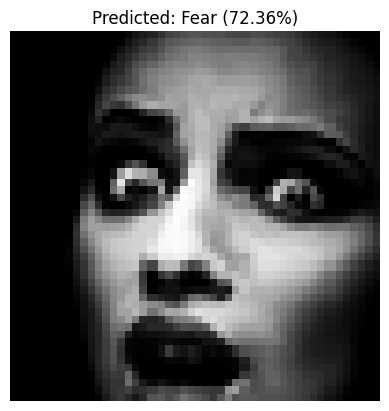

In [19]:
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
from tensorflow.keras.preprocessing import image

# Class labels for your model (update as needed)
class_names = ['Angry', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral']

# Path to your sample image
img_path = '/kaggle/input/fer2013plus/fer2013plus/fer2013/test/fear/fer0028820.png'  # <- update this

# Load image (grayscale + resized to 100x100)
img = image.load_img(img_path, target_size=(100, 100), color_mode='grayscale')
img_array = image.img_to_array(img)
img_array_scaled = img_array / 255.0
img_batch = np.expand_dims(img_array_scaled, axis=0)  # shape: (1, 100, 100, 1)

# Predict
predictions = model.predict(img_batch)
predicted_class = np.argmax(predictions, axis=1)[0]
confidence = predictions[0][predicted_class]

# Plot the image with predicted class name
plt.imshow(img_array.squeeze(), cmap='gray')  # squeeze to remove 1-channel dimension
plt.title(f"Predicted: {class_names[predicted_class]} ({confidence*100:.2f}%)")
plt.axis('off')
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


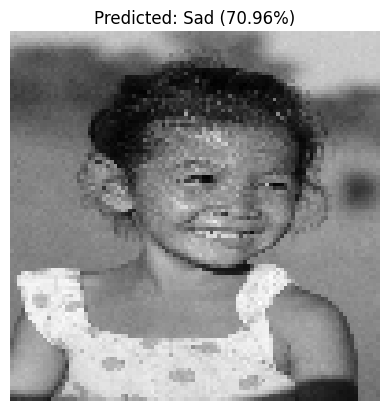

In [26]:
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
from tensorflow.keras.preprocessing import image

# Class labels for your model (update as needed)
class_names = ['Angry', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral']

# Path to your sample image
img_path = '/kaggle/input/dataset/img1.jpg'  # <- update this

# Load image (grayscale + resized to 100x100)
img = image.load_img(img_path, target_size=(100, 100), color_mode='grayscale')
img_array = image.img_to_array(img)
img_array_scaled = img_array / 255.0
img_batch = np.expand_dims(img_array_scaled, axis=0)  # shape: (1, 100, 100, 1)

# Predict
predictions = model.predict(img_batch)
predicted_class = np.argmax(predictions, axis=1)[0]
confidence = predictions[0][predicted_class]

# Plot the image with predicted class name
plt.imshow(img_array.squeeze(), cmap='gray')  # squeeze to remove 1-channel dimension
plt.title(f"Predicted: {class_names[predicted_class]} ({confidence*100:.2f}%)")
plt.axis('off')
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


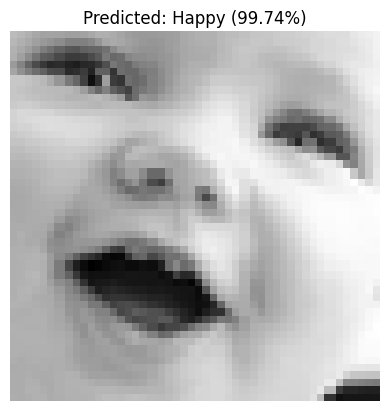

In [21]:
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
from tensorflow.keras.preprocessing import image

# Class labels for your model (update as needed)
class_names = ['Angry', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral']

# Path to your sample image
img_path = '/kaggle/input/fer2013plus/fer2013plus/fer2013/test/happiness/fer0028648.png'  # <- update this

# Load image (grayscale + resized to 100x100)
img = image.load_img(img_path, target_size=(100, 100), color_mode='grayscale')
img_array = image.img_to_array(img)
img_array_scaled = img_array / 255.0
img_batch = np.expand_dims(img_array_scaled, axis=0)  # shape: (1, 100, 100, 1)

# Predict
predictions = model.predict(img_batch)
predicted_class = np.argmax(predictions, axis=1)[0]
confidence = predictions[0][predicted_class]

# Plot the image with predicted class name
plt.imshow(img_array.squeeze(), cmap='gray')  # squeeze to remove 1-channel dimension
plt.title(f"Predicted: {class_names[predicted_class]} ({confidence*100:.2f}%)")
plt.axis('off')
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


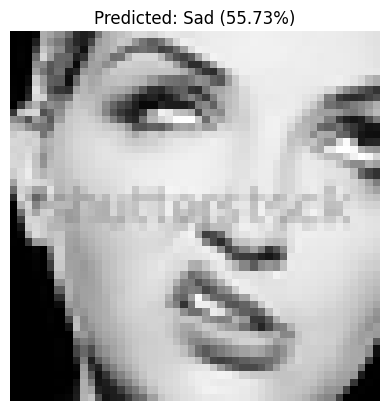

In [22]:
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
from tensorflow.keras.preprocessing import image

# Class labels for your model (update as needed)
class_names = ['Angry', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral']

# Path to your sample image
img_path = '/kaggle/input/fer2013plus/fer2013plus/fer2013/test/contempt/fer0029150.png'  # <- update this

# Load image (grayscale + resized to 100x100)
img = image.load_img(img_path, target_size=(100, 100), color_mode='grayscale')
img_array = image.img_to_array(img)
img_array_scaled = img_array / 255.0
img_batch = np.expand_dims(img_array_scaled, axis=0)  # shape: (1, 100, 100, 1)

# Predict
predictions = model.predict(img_batch)
predicted_class = np.argmax(predictions, axis=1)[0]
confidence = predictions[0][predicted_class]

# Plot the image with predicted class name
plt.imshow(img_array.squeeze(), cmap='gray')  # squeeze to remove 1-channel dimension
plt.title(f"Predicted: {class_names[predicted_class]} ({confidence*100:.2f}%)")
plt.axis('off')
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


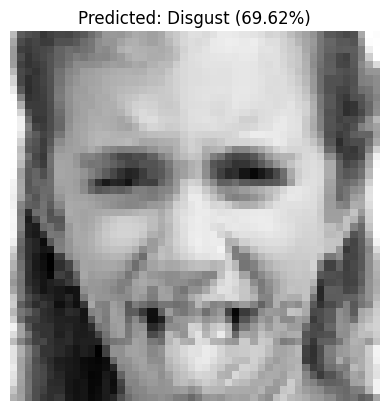

In [23]:
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
from tensorflow.keras.preprocessing import image

# Class labels for your model (update as needed)
class_names = ['Angry', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral']

# Path to your sample image
img_path = '/kaggle/input/fer2013plus/fer2013plus/fer2013/test/disgust/fer0030565.png'  # <- update this

# Load image (grayscale + resized to 100x100)
img = image.load_img(img_path, target_size=(100, 100), color_mode='grayscale')
img_array = image.img_to_array(img)
img_array_scaled = img_array / 255.0
img_batch = np.expand_dims(img_array_scaled, axis=0)  # shape: (1, 100, 100, 1)

# Predict
predictions = model.predict(img_batch)
predicted_class = np.argmax(predictions, axis=1)[0]
confidence = predictions[0][predicted_class]

# Plot the image with predicted class name
plt.imshow(img_array.squeeze(), cmap='gray')  # squeeze to remove 1-channel dimension
plt.title(f"Predicted: {class_names[predicted_class]} ({confidence*100:.2f}%)")
plt.axis('off')
plt.show()


In [24]:
model.save("/kaggle/working/emotion_model_CustomCNN_v1.h5")


In [ ]:
model.save("/kaggle/working/emotion_model_archi.keras")